# Regression Model analysis on Vehicle sale

## Import Libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import mean_squared_error as mse

## Load Dataset

In [7]:
sales_df = pd.read_csv("Australian_vehivle_sale.csv")
sales_df

,Year,Sales,Growth
0,2005,608804,NaN
1,2006,598394,-1.71
2,2007,637019,6.45
3,2008,596765,-6.32
4,2009,540562,-9.42
5,2010,592122,9.54
6,2011,559314,-5.54
7,2012,576855,3.14
8,2013,566454,-1.80
9,2014,531596,-6.15


## Analyse the number of null values in the dataset

In [8]:
sales_df.isnull().sum()

Year      0
Sales     0
Growth    1
dtype: int64

## Data Cleaning Process:
### The best practice of a Data Scienetist is before starting the data cleaning process, we need to make a copy of a dataframe, so that the changes made should not impact the original data.
### I'm assigning the original data frame to a new data frame named as "cleaned_veh_sales"
### As we have seen there is a null value in the growth column, so have to impute this null value based on the requirements. I'm imputing the null value with the median value of the column.

### Earlier the value at index 0 was null and now after imputing it with median tha value filled at index 0 is -1.71.

In [37]:
cleaned_veh_sales['Growth']

0     -1.71
1     -1.71
2      6.45
3     -6.32
4     -9.42
5      9.54
6     -5.54
7      3.14
8     -1.80
9     -6.15
10    73.85
11     0.34
12    -1.25
13    -4.58
14    -8.52
15   -15.32
16    11.30
17     3.24
Name: Growth, dtype: float64

### To get insights into the data and analyse the trend of data I'm using a bar chart here, and we can see that in 2015 there was the hightes growth in sales of vehicles.

<BarContainer object of 18 artists>

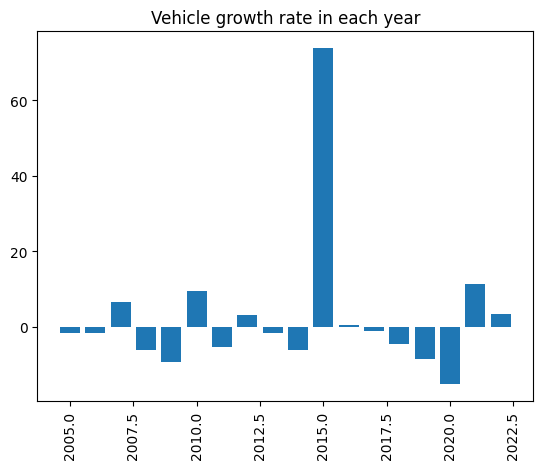

In [245]:
x=cleaned_veh_sales['Year']
y=cleaned_veh_sales['Growth']
plt.xticks(rotation = 90)
plt.title("Vehicle growth rate in each year")

plt.bar(x,y)

### Now its time to split the target and features from the dataset. I'm considering sale's growth column as target and rest other two columns i.e Year and sales as features.

### The shape below shows that features are two dimensional data and where as target is 1 dimensional data.

In [40]:
print("The shape of features are:",x.shape)
print("The shape of target is:", y.shape)

The shape of features are: (18, 2)
The shape of target is: (18,)


### The next important step is to split the data into train, validation and test sets.
### We train the data using the unseen data to let model learn and start predictions.
### Then validation data set used for predictions to analyse whether the model has learned the data properly and this validation data is unseen data compared to trained data. If the model neither under fits and nor overfits then we move to the final step of testing the model using the test set.
### Testing is not repeated, it is done only once at the end.

In [41]:
from sklearn.model_selection import train_test_split

In [51]:
x_data, x_test, y_data, y_test = train_test_split(x,y, test_size=0.2, random_state= 1)

### Scaling the data is crucial step and it should not be skipped. The reason is explained below:
### Features converge faster when they are scaled. Without scaling, features with larger ranges can dominate the gradient, causing the optimization process to be inefficient.
### Scaling ensures that all features contribute equally to the result. If features are on different scales, some features may dominate others, leading to skewed model performance.

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

### To initialte the training process I'm importing the LinearRegression algorith from Scikit learn package.

In [56]:
from sklearn.linear_model import LinearRegression

### Instantiating the class

In [58]:
linear = LinearRegression()

### Fitting the model on train data

In [59]:
fit_train = linear.fit(x_train, y_train)

### Performing prediction on train data

In [61]:
print(mse(y_train, y_preds, squared = False))
print(mae(y_train, y_preds))

21.58006303281303
17.43954953102921


In [62]:
linear.intercept_

6871.147125357372

### Coefficient of determination (R2)	Interpretation.
####  1. 0 means the model does not predict the outcome.
#### 2. 1 means	the model perfectly predicts the outcome.
#### Between 0 and 1, the model partially predicts the outcome.

estimated slope coefficients value is

In [63]:
linear.coef_

array([-3.45877242e+00,  1.35653013e-04])

### The obtained slope score of test set is -3.43

In [64]:
linear.score(x_test,y_test)

-3.431454113478564

In [65]:
import altair as alt

### The chart suggests that the model has not generalized properly, as the training data points are scattered significantly away from the predicted values.

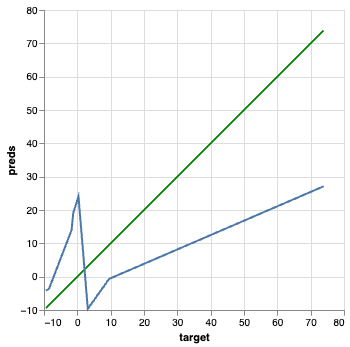

In [67]:
preds_y_val = linear.predict(x_val)

In [68]:
print(mse(y_val,preds_y_val, squared = False))
print(mae(y_val,preds_y_val))

18.857833931433717
17.785192340259908


### The model performed well on the training data but did not generalize effectively to the unseen validation data, indicating overfitting to the training set,resulting in poor performance on new, unseen data.

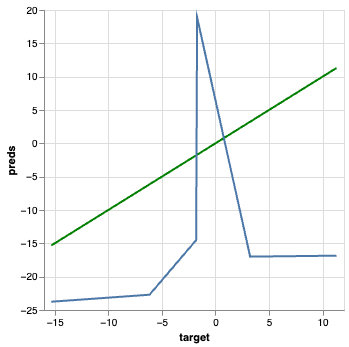

### Applying prediction on the test set, which is agian unseen data compared to train set data.

In [70]:
preds_y_test = linear.predict(x_test)

In [71]:
print(mse(y_test,preds_y_test, squared = False))
print(mae(y_test, preds_y_test))

10.951734597265467
10.009316299504725


### The chart shows that the prediction outcomes indicate the model has not generalized well to the test data, suggesting that the model may be overfitting to the training data.

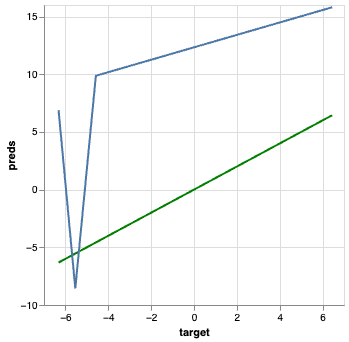

#### Comparing the mse and mae scores of train , validation and test sets
##### Train set mse score: 21.58006303281303
##### Train set mae score: 17.43954953102921
##### Validation set mae score: 18.857833931433717
##### Validation set mse score: 17.785192340259908
##### Test set mae score: 10.951734597265467
##### Test set mse score: 10.009316299504725

### Result Analysis of score: Train set is overfitting the model.To over come this problem we need to make the new models by either tuning the hyper-parameters or else we need to test the model using the another algorithm


# Model 2:
### Trying another model with some hyper parameters

In [74]:
forest_reg1= RandomForestRegressor( n_estimators = 100,criterion='squared_error', max_depth=2, min_samples_split=2, min_samples_leaf=1,random_state=42)

In [76]:
y_forest_preds = forest_reg1.predict(x_train)

In [80]:
print(mse(y_train,y_forest_preds, squared = False))
print(mae(y_train, y_forest_preds))

12.164610194914172
9.418704374999994


In [81]:
import altair as alt

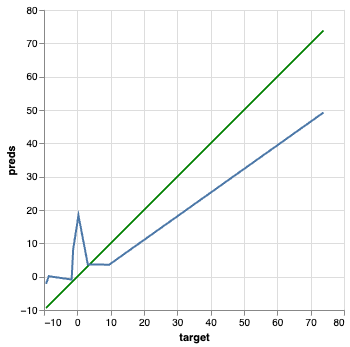

#### Validation test

In [83]:
y_val_pred = forest_reg1.predict(x_val)

In [84]:
print(mse(y_val, y_val_pred, squared= False))
print(mae(y_val, y_val_pred))

9.273152122335528
7.7411988888888885


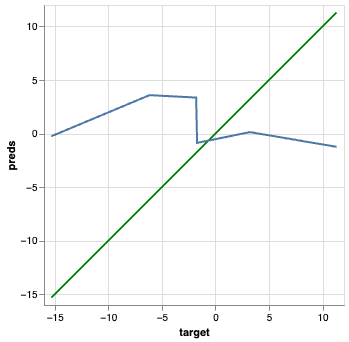

In [86]:
y_test_pred = forest_reg1.predict(x_test)


In [87]:
print(mse(y_test, y_test_pred, squared=False))
print(mae(y_test, y_test_pred))

8.782610139733439
8.384720833333333


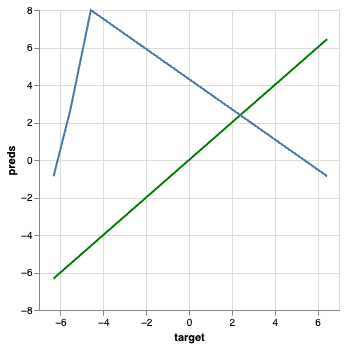

### Results from Random Forest algorithm model
##### Train set mse score: 12.164610194914172
##### Train set mae score: 9.418704374999994
##### Validation set mae score: 9.273152122335528
##### Validation set mse score: 7.7411988888888885
##### Test set mae score: 8.782610139733439
##### Test set mse score: 8.384720833333333

### Still model is overfitting, to make the perfectly generalized model, more training of models is required.